<a href="https://colab.research.google.com/github/Dr-Mohamed-Elkholy/NLP/blob/main/Basic_text_representation_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Text Representation
The Twitter dataset (`tweets.csv`) was collected in February of 2015. Contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). The dataset can be found [here.](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

You should build an NLP pipeline to find all tweets that are related to `bad catering service`. In particular, you should do the following:
- Load the `tweets` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Train a text representation model, such as the [bag of n-gram vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) or [TF-IDF vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), on the content of the tweets.
- Apply the trained text representation model to vectorize the query (i.e., `bad catering service`) and all documents (i.e., tweets).
- Calculate the similarity of each vectorized tweet to the vectorized query using a similarity measure, such as [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html).
- Rank the tweets based on the similarity of their vectors to the query vector.
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [ ]:
# Step 1: Load the tweets dataset using Pandas
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/tweets.csv'
tweets_df = pd.read_csv(url)

tweets_df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

tweets_df['text_clean'] = tweets_df['text'].apply(preprocess_text)
tweets_df['text_clean']

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercials exp...
2                 virginamerica didnt today mean need trip
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving 20 minutes late flight war...
14637     americanair bring american airlines blackberry10
14638    americanair money change flight dont answer ph...
14639    americanair 8 ppl need 2 know seats flight plz...
Name: text_clean, Length: 14640, dtype: object

In [ ]:

# Step 3: Train a TF-IDF vectorizer on the content of the tweets
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_df['text_clean'])

# Step 4: Vectorize the query
query = "bad catering service"
query_vector = tfidf_vectorizer.transform([preprocess_text(query)])
query_vector

<1x216 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:

# Step 5: Calculate the cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Step 6: Rank the tweets based on similarity score
tweets_df['similarity'] = cosine_similarities
ranked_tweets = tweets_df.sort_values('similarity', ascending=False)

# Display the ranked tweets
print(ranked_tweets[['text_clean', 'similarity']].head())

print('-------------')

print(ranked_tweets[['text', 'similarity']].head())

                                              text_clean  similarity
11635    usairways bad weather shouldnt mean bad service    0.866605
9199   usairways cust svc means disappointed trying 7...    0.811758
14487  americanair reservations teams fault bad topdo...    0.798829
12737              americanair bad service miami airport    0.771619
10923  usairways completely wasted work day thank bad...    0.769501
-------------
                                                    text  similarity
11635  @USAirways bad weather shouldn't mean bad service    0.866605
9199   @USAirways cust svc means nothing! So disappoi...    0.811758
14487  .@AmericanAir Also, not the reservations team'...    0.798829
12737    @AmericanAir SO BAD service in Miami, AirPort..    0.771619
10923  @USAirways has completely wasted my work day! ...    0.769501


# n-grams 3

In [ ]:

# Step 2: Preprocess the text data
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

tweets_df['text_clean'] = tweets_df['text'].apply(preprocess_text)

# Step 3: Train a TF-IDF vectorizer on the content of the tweets with n-grams up to 3
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 4))
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_df['text_clean'])

# Step 4: Vectorize the query with the same n-gram range
query = "bad catering service"
query_vector = tfidf_vectorizer.transform([preprocess_text(query)])

# Step 5: Calculate the cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Step 6: Rank the tweets based on similarity score
tweets_df['similarity'] = cosine_similarities
ranked_tweets = tweets_df.sort_values('similarity', ascending=False)

# Display the ranked tweets
print(ranked_tweets[['text', 'similarity']].head())



                                                   text  similarity
0                   @VirginAmerica What @dhepburn said.         0.0
9751  @USAirways  Interesting you forward compliment...         0.0
9753  @USAirways how is it that the airport (DCA) an...         0.0
9754  @USAirways in line for 90 min after mechanical...         0.0
9755  @USAirways the entire flight crew on flight 73...         0.0


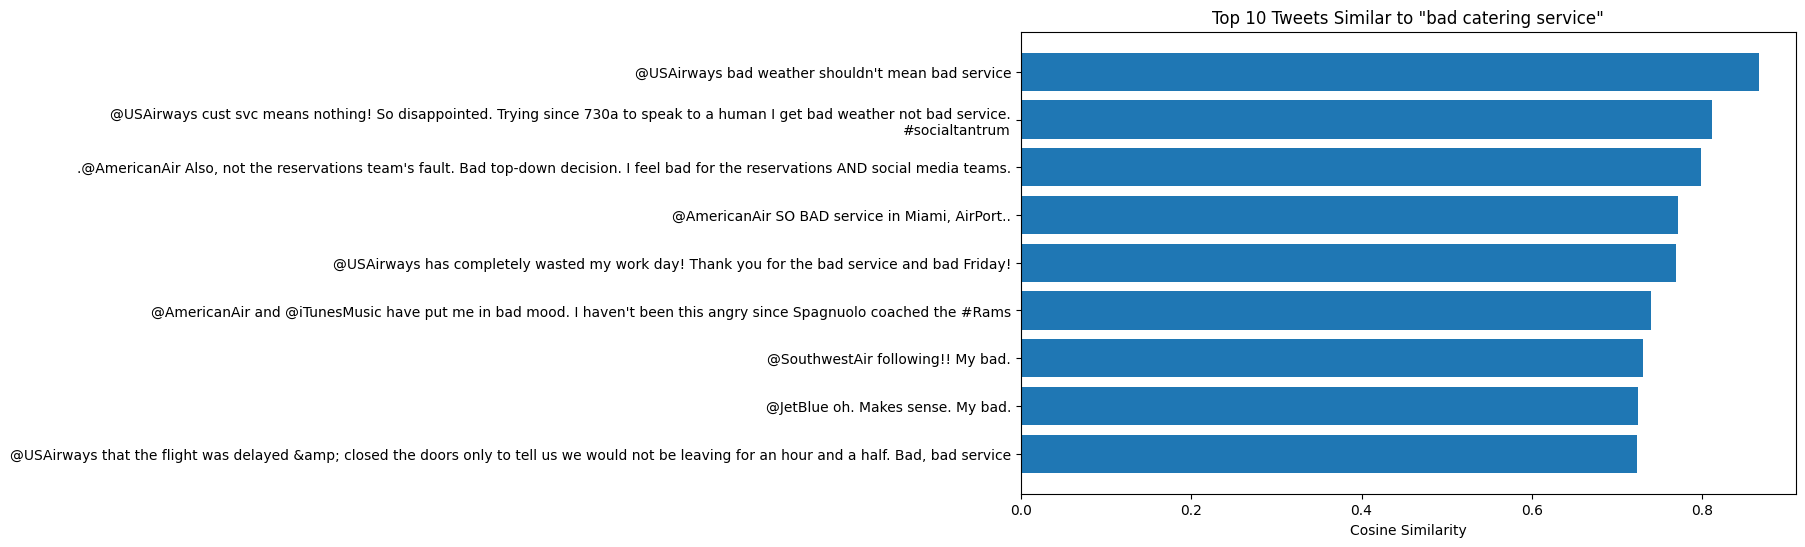

In [ ]:
# Step 8: Visualization
import matplotlib.pyplot as plt

# Get the top 10 similar tweets
top_tweets = ranked_tweets.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_tweets['text'].iloc[::-1], top_tweets['similarity'].iloc[::-1])
plt.xlabel('Cosine Similarity')
plt.title('Top 10 Tweets Similar to "bad catering service"')
plt.show()
